# Import libraries

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import json
import requests
from dotenv import load_dotenv
import os
from datetime import datetime


# Set Up Search

We’ll start by searching Google for articles from the Financial Times that mention Bitcoin using a trick called "site:ft.com bitcoin".

However, Google doesn’t like bots much, so instead of using requests, we’ll use a Python library called serpapi, which is free to start with and built for scraping search results.

But for now, let's try the basic approach using requests and BeautifulSoup to check if we can get results from DuckDuckGo, which is more scrape-friendly.

In [22]:

# Step 1: Define the search query
query = "bitcoin site:ft.com"
url = f"https://html.duckduckgo.com/html/?q={query}"

# Step 2: Send the request
headers = {
    "User-Agent": "Mozilla/5.0"
}
response = requests.get(url, headers=headers)

# Step 3: Parse the results
soup = BeautifulSoup(response.text, "html.parser")
results = soup.find_all("a", class_="result__a")

# Step 4: Store the results
articles = []
for result in results:
    title = result.get_text()
    link = result['href']
    articles.append({"title": title, "link": link})

# Step 5: Convert to DataFrame
ft_df = pd.DataFrame(articles)
print(ft_df.head())

# Step 6: Save to CSV
ft_df.to_csv("bitcoin_ft_articles.csv", index=False)



                                               title  \
0                          Bitcoin - Financial Times   
1  BlackRock closes in on crown of world's larges...   
2  If spot bitcoin ETFs are so great, why's the b...   
3  The bitcoin ETF market's single point of failu...   
4  Bitcoin price tops $50,000 after spot ETF laun...   

                                                link  
0  //duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft....  
1  //duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft....  
2  //duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft....  
3  //duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft....  
4  //duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft....  


In [23]:
results

[<a class="result__a" href="//duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft.com%2Fbitcoin&amp;rut=c9050796ea034faf332e1571fbf5f08aa674c1b31f3538de9366f67208c059ea" rel="nofollow">Bitcoin - Financial Times</a>,
 <a class="result__a" href="//duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft.com%2Fcontent%2F3b80713e%2D41d1%2D4965%2D900e%2D4bb37b1dbc2c&amp;rut=0026617616f9a06934bc965869592a9059e5a569eeef1d96bff225bbc70d721d" rel="nofollow">BlackRock closes in on crown of world's largest bitcoin fund</a>,
 <a class="result__a" href="//duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft.com%2Fcontent%2Fadd2ad9f%2Df3b5%2D42b4%2D98e7%2D13b556b4aeb9&amp;rut=ee42f6cb912e736c21d2e4fd7edccc5cbf5a88d2c728da9fff1bbe4bdcbc252b" rel="nofollow">If spot bitcoin ETFs are so great, why's the bitcoin price down?</a>,
 <a class="result__a" href="//duckduckgo.com/l/?uddg=https%3A%2F%2Fwww.ft.com%2Fcontent%2F9e9fafd8%2Dc86d%2D4889%2D897a%2D690380cdb5bc&amp;rut=69141f3a6fc34b7b9a53d03d152eb2ec8be58ea4d3b96eae1baa976f998f8116"

#NOTE -  - What are headers?
Headers are extra info you send with your request to the website.

The User-Agent tells the site who is visiting — usually a web browser like Chrome or Firefox.

Without this, the site might know it’s a bot (not a human) and block you.
So we're pretending to be a regular browser by saying:

“Hi, I’m a normal human using Mozilla/Chrome!”

🛡️ Why it's important: Helps avoid blocks or errors from sites that dislike bots.

❓ What is BeautifulSoup doing?
Think of BeautifulSoup like a smart highlighter. It takes the messy HTML code of a webpage and helps you pick out the parts you want.

soup = BeautifulSoup(...)
→ Turns the raw HTML from the page into a searchable format.

soup.find_all("a", class_="result__a")
→ Looks for all <a> tags (which are links), with the class "result__a", which DuckDuckGo uses for search result titles.

Basically, you’re saying:

“Show me all the links that are search results.”

Then we loop through those links and pull out the title and URL.

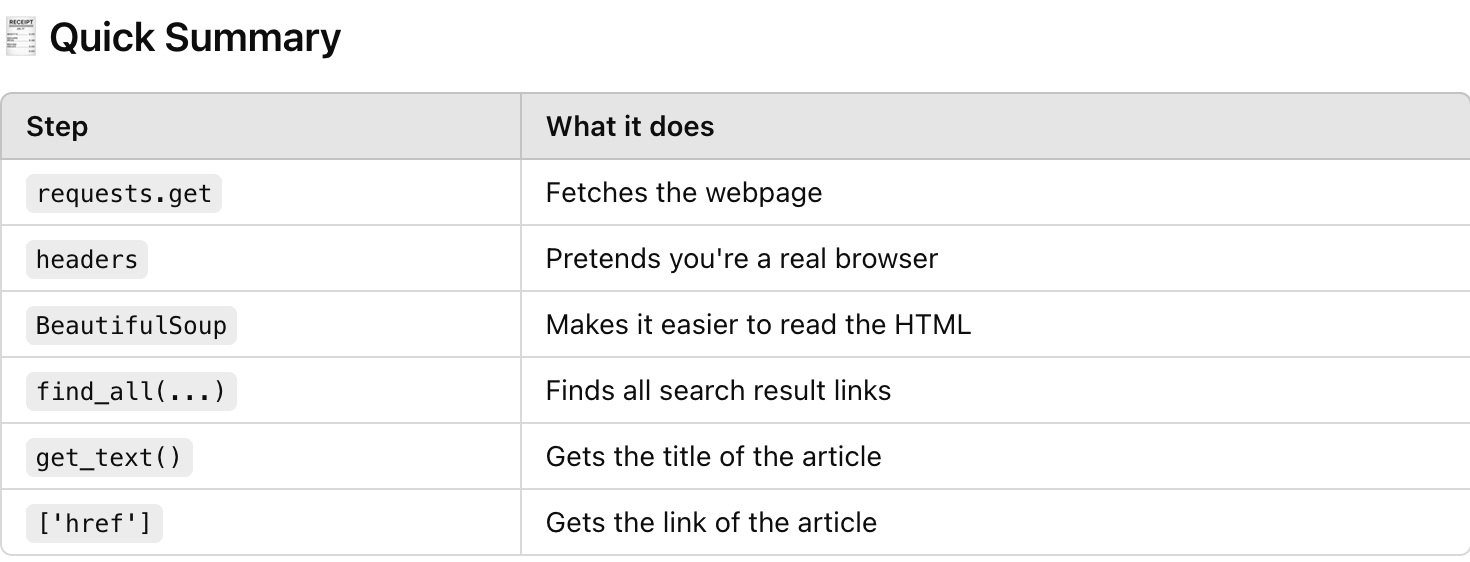

# Scrape Google Search Results Using SerpAPI

In [3]:
from serpapi import GoogleSearch
import pandas as pd

In [4]:
# loading api key
load_dotenv()
serp_api_key = os.getenv("SERP_API_KEY")

In [5]:
# Set up your search
params = {
    "engine": "google",
    "q": "bitcoin site:ft.com",
    "api_key": serp_api_key,
    "num": 20  # number of results to fetch (max 100)
}

# Run the search
search = GoogleSearch(params)
results = search.get_dict()

# Get the organic search results
articles = results.get("organic_results", [])

# Parse titles and links
data = []
for article in articles:
    title = article.get("title")
    link = article.get("link")
    snippet = article.get("snippet")
    data.append({
        "title": title,
        "link": link,
        "snippet": snippet
    })

# Save to DataFrame
google_btc_df = pd.DataFrame(data)

# Save to CSV
google_btc_df.to_csv("google_bitcoin_ft.csv", index=False)


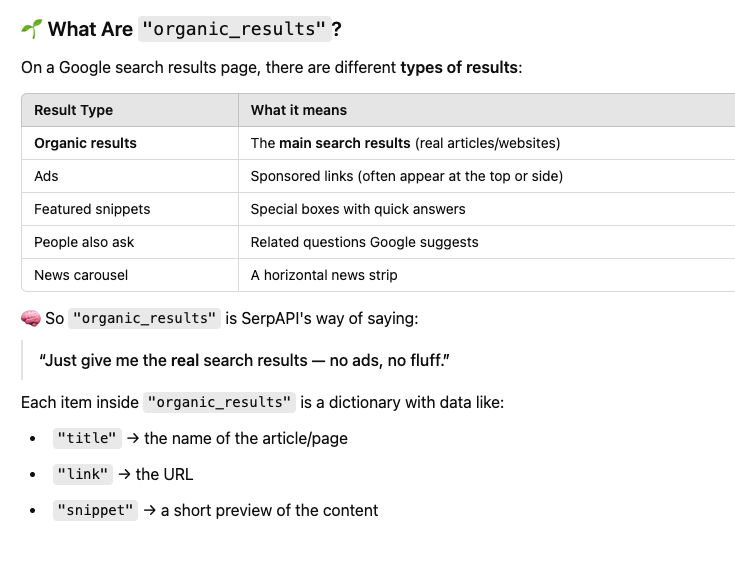

In [6]:
google_btc_df.head()

,title,link,snippet
0,Bitcoin,https://www.ft.com/bitcoin,US endowments join crypto rush by building bit...
1,Can Trump make bitcoin useful? - Visual and da...,https://ig.ft.com/trump-bitcoin-reserve/,Advocates say bitcoin would be an effective re...
2,Bitcoin hits $100000 as Trump era hopes grow,https://www.ft.com/content/f8db431e-57f9-4b43-...,The price of the world's largest cryptocurrenc...
3,Crypto prices fall as US strategic reserve pla...,https://www.ft.com/content/08a1f7f3-4be2-4f36-...,The price of bitcoin dropped 2.7 per cent to t...
4,"In Bhutan, bitcoin reserves are already common...",https://www.ft.com/content/c20f951a-f968-41af-...,Sovereign bitcoin reserves are a relatively sm...


# Scraping straight from Financial Times URL

In [25]:
import requests
from bs4 import BeautifulSoup
# selectin an article
url = "https://www.ft.com/content/df3c4ccc-680a-4be3-8b92-6dac4581a962"

headers = {
    "User-Agent": "Mozilla/5.0"
}

# Step 1: Fetch the page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Extract article text (may be limited due to paywall)
# FT articles often use <p> tags inside <div> with specific classes

paragraphs = soup.find_all("p")
text = "\n".join([p.get_text() for p in paragraphs])

print("ARTICLE CONTENT (maybe partial):\n")
print(text[:1000])  # print first 1000 characters


ARTICLE CONTENT (maybe partial):

Then €69 per month.
Complete digital access to quality FT journalism on any device. 
Cancel anytime during your trial.
Essential digital access to quality FT journalism on any device. Pay a year upfront and save 20%.
Complete digital access to quality FT journalism with expert analysis from industry leaders. Pay a year upfront and save 20%.
Complete digital access to quality analysis and expert insights, complemented with our award-winning Weekend Print edition.
Terms & Conditions apply
See why over a million readers pay to read the Financial Times.


Yep, that’s the classic FT paywall defense — you’re basically scraping the subscribe page instead of the actual article 😅

But this is a good learning moment! Let’s explore why it happens and what we can (and can’t) do about it — and then try a workaround.

 Why You’re Not Getting the Real Article
FT uses JavaScript to load the article, which requests can't handle (it's just HTML).

If you're not logged in, FT hides the article and shows you subscription offers.

Even with BeautifulSoup, you’re only seeing what’s in the raw HTML response — no JavaScript, no dynamic loading

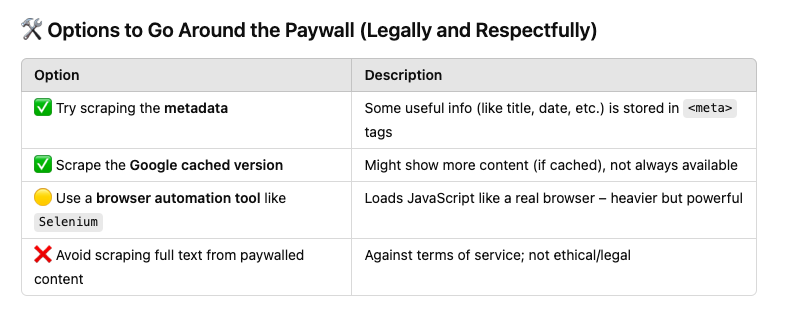

## scraping Metadata from a FT article
Even if we can’t see the article, we can sometimes get:

Title

Description

Publish date

In [8]:
import requests
from bs4 import BeautifulSoup

# random article from ft
url = "https://www.ft.com/content/df3c4ccc-680a-4be3-8b92-6dac4581a962"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Extract metadata
title = soup.find("meta", property="og:title")
description = soup.find("meta", property="og:description")
published = soup.find("meta", itemprop="datePublished")

print("Title:", title["content"] if title else "N/A")
print("Description:", description["content"] if description else "N/A")
print("Published:", published["content"] if published else "N/A")


Title: Crypto world needs to get better at counterparty risk
Description: A more developed digital asset ecosystem would bring substantive benefits 
Published: N/A


found title and description in the metadata, but no published date. I checked in the html and found that info here

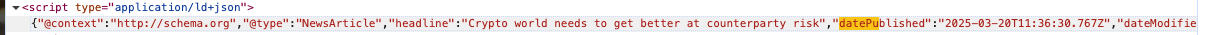

that's a JSON-LD block (structured data) embedded in the page. That’s a gold mine for scraping 🙌

Inside it, we can see fields like:

"@type": "NewsArticle"

"datePublished": "2025-03-20T11:36:30.767Z"

"headline": "..."

So now, instead of looking for meta tags, we’ll extract and parse this JSON.

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

url = "https://www.ft.com/content/df3c4ccc-680a-4be3-8b92-6dac4581a962"

headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")



# Step 1: Find all <script> tags with type="application/ld+json"
json_ld_tags = soup.find_all("script", type="application/ld+json")

# Step 2: Loop through and look for one that contains "@type": "NewsArticle"
for tag in json_ld_tags:
    try:
        data = json.loads(tag.string)
        if data.get("@type") == "NewsArticle":
            headline = data.get("headline")
            date_published = data.get("datePublished")
            author = data.get("author", [{}])[0].get("name", "N/A")

            print("Headline:", headline)
            print("Published:", date_published)
            print("Author:", author)
            break  # Stop after the first valid article
    except (json.JSONDecodeError, TypeError):
        continue  # Some <script> blocks might not be valid JSON


Headline: Crypto world needs to get better at counterparty risk
Published: 2025-03-20T11:36:30.767Z
Author: Kelly Hampaul


🧠 Can You Skip SerpAPI and Go Straight to ft.com?
Yes in theory, but here’s the catch:

🚫 The Financial Times doesn’t offer a public page where you can:
Search for "bitcoin"

Get a clean list of article links

Scrape them without JavaScript

So unless FT has a public, HTML-based archive or sitemap (which they don’t for all topics), you won’t be able to scrape article URLs just from ft.com directly.

## Pipeline
Steps:

🔍 Google search for “bitcoin site:ft.com” using SerpAPI

🔗 Collects article titles, links, and snippets

🧠 Visits each link and extracts:

Headline (title)

Publish date

Author (if available)

🧾 Saves everything to a CSV

In [10]:
import requests
from bs4 import BeautifulSoup
from serpapi import GoogleSearch
import pandas as pd
import json
import time


# STEP 1: Search Google for "bitcoin site:ft.com"
print("🔍 Searching Google via SerpAPI...")

search_params = {
    "engine": "google",
    "q": "bitcoin site:ft.com",
    "api_key": serp_api_key,
    "num": 20  # Number of search results to fetch
}

search = GoogleSearch(search_params)
search_results = search.get_dict()

articles = search_results.get("organic_results", [])

# Extract basic info
article_links = []
for article in articles:
    title = article.get("title")
    link = article.get("link")
    snippet = article.get("snippet")
    article_links.append({"title": title, "link": link, "snippet": snippet})

print(f"✅ Found {len(article_links)} articles.")

# STEP 2: Scrape each article for metadata
print("🧠 Scraping article metadata...")

results = []

for article in article_links:
    url = article["link"]
    print(f"→ Scraping: {url}")
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")

        # Look for JSON-LD structured data
        json_ld_tags = soup.find_all("script", type="application/ld+json")

        for tag in json_ld_tags:
            try:
                data = json.loads(tag.string)
                if isinstance(data, dict) and data.get("@type") == "NewsArticle":
                    results.append({
                        "title": data.get("headline"),
                        "date_published": data.get("datePublished"),
                        "author": data.get("author", [{}])[0].get("name", "N/A"),
                        "url": url,
                        "snippet": article.get("snippet")
                    })
                    break
            except (json.JSONDecodeError, TypeError):
                continue

        time.sleep(1)  # polite pause

    except Exception as e:
        print(f"⚠️ Failed to scrape {url}: {e}")

# STEP 3: Save to CSV
btc_ft_df = pd.DataFrame(results)
btc_ft_df.to_csv("bitcoin_ft_metadata.csv", index=False)



🔍 Searching Google via SerpAPI...
✅ Found 19 articles.
🧠 Scraping article metadata...
→ Scraping: https://www.ft.com/bitcoin
→ Scraping: https://ig.ft.com/trump-bitcoin-reserve/
→ Scraping: https://www.ft.com/content/f8db431e-57f9-4b43-8873-263101d070a5
→ Scraping: https://www.ft.com/content/08a1f7f3-4be2-4f36-959d-4ac57213450b
→ Scraping: https://www.ft.com/content/c20f951a-f968-41af-915f-b448ad577618
⚠️ Failed to scrape https://www.ft.com/content/c20f951a-f968-41af-915f-b448ad577618: list index out of range
→ Scraping: https://www.ft.com/content/f964fe30-cb6e-427d-b7a7-9adf2ab8a457
→ Scraping: https://www.ft.com/content/0cfbe43c-7c2a-40bf-8bb7-92f58a9d2389
→ Scraping: https://www.ft.com/content/cb9511a5-5df7-4ba7-974a-2f00d9d2128c
→ Scraping: https://www.ft.com/content/4146fbca-2930-41ef-965d-9cc8ea1d9aaf
→ Scraping: https://www.ft.com/content/a3c06f8f-34ad-4065-bcf4-97670230824f
→ Scraping: https://www.ft.com/content/73fa6fd9-6f34-4e59-8f0f-04de3be7387a
→ Scraping: https://www.ft.co

In [11]:
btc_ft_df

,title,date_published,author,url,snippet
0,"Bitcoin hits $100,000 as Trump era hopes grow",2024-12-05T04:34:25.453Z,Nikou Asgari,https://www.ft.com/content/f8db431e-57f9-4b43-...,The price of the world's largest cryptocurrenc...
1,Crypto prices fall as US strategic reserve pla...,2025-03-07T16:45:27.784Z,Nikou Asgari,https://www.ft.com/content/08a1f7f3-4be2-4f36-...,The price of bitcoin dropped 2.7 per cent to t...
2,The MicroStrategy copycats: companies turn to ...,2025-02-05T04:00:08.401Z,Nikou Asgari,https://www.ft.com/content/f964fe30-cb6e-427d-...,Software business-turned-bitcoin hoarder Micro...
3,Bitcoin miners stockpile coins to ride out pro...,2025-01-07T04:00:27.594Z,Niamh Rowe,https://www.ft.com/content/0cfbe43c-7c2a-40bf-...,Bitcoin miners stockpile coins to ride out pro...
4,US endowments join crypto rush by building bit...,2025-02-09T05:00:40.589Z,Sun Yu,https://www.ft.com/content/cb9511a5-5df7-4ba7-...,US foundations and university endowments are r...
5,Pension funds dabble in crypto after massive b...,2025-01-16T05:00:17.939Z,Nikou Asgari,https://www.ft.com/content/4146fbca-2930-41ef-...,Pension funds are dipping their toes into buyi...
6,Czech central bank head wants it to buy billio...,2025-01-29T05:00:47.910Z,Raphael Minder,https://www.ft.com/content/a3c06f8f-34ad-4065-...,"The government holds 6,048 bitcoins in its tre..."
7,The delusions behind a bitcoin strategic reserve,2024-11-23T05:01:01.071Z,Brendan Greeley,https://www.ft.com/content/73fa6fd9-6f34-4e59-...,A programme instructing the Treasury and the F...
8,Bitcoin’s shift towards respectability should ...,2024-11-18T12:30:29.225Z,Stephen Diehl,https://www.ft.com/content/8ab293b4-ee98-4d2a-...,"Consider the historical irony: bitcoin, concei..."
9,"Bitcoin hits record above $75,000 as crypto in...",2024-11-06T16:40:40.177Z,Nikou Asgari,https://www.ft.com/content/bdc3311d-3a29-4a3a-...,The world's biggest cryptocurrency rallied mor...


# FT scraper neat
same as before but organized in functions to be able to replicate it

## imports

In [12]:
import requests
from bs4 import BeautifulSoup
from serpapi import GoogleSearch
import pandas as pd
import json
import time


## SerpAPI Search Function

In [17]:
def search_articles(query, api_key, num_results=20):
    print(f"🔍 Searching Google for '{query}'...")

    params = {
        "engine": "google",
        "q": query,
        "api_key": serp_api_key,
        "num": num_results
    }

    search = GoogleSearch(params)
    results = search.get_dict()
    articles = results.get("organic_results", [])

    article_links = []
    for article in articles:
        title = article.get("title")
        link = article.get("link")
        snippet = article.get("snippet")
        article_links.append({"title": title, "link": link, "snippet": snippet})

    print(f"✅ Found {len(article_links)} articles.")
    return article_links


## Article Metadata Extractor

In [ ]:
def extract_metadata(article):
    url = article["link"]
    print(f"→ Scraping: {url}")
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")

        json_ld_tags = soup.find_all("script", type="application/ld+json")
        for tag in json_ld_tags:
            try:
                data = json.loads(tag.string)
                if isinstance(data, dict) and data.get("@type") == "NewsArticle":
                    return {
                        "title": data.get("headline"),
                        "date_published": data.get("datePublished"),
                        "author": data.get("author", [{}])[0].get("name", "N/A"),
                        "url": url,
                        "snippet": article.get("snippet")
                    }
            except (json.JSONDecodeError, TypeError):
                continue

    except Exception as e:
        print(f"⚠️ Failed to scrape {url}: {e}")
    return None


## Main Scraper Runner

In [19]:
def scrape_all(query, api_key, limit=20):
    articles = search_articles(query, api_key, limit)
    results = []

    for article in articles:
        metadata = extract_metadata(article)
        if metadata:
            results.append(metadata)
        time.sleep(1)  # Be polite

    df = pd.DataFrame(results)
    return df


## Run the Scraper and Save Results

In [20]:
# 🔐 Replace with your actual SerpAPI API key
SERP_API_KEY = serp_api_key
QUERY = "bitcoin site:ft.com"

df = scrape_all(QUERY, SERP_API_KEY)

# Show the data
df.head()


🔍 Searching Google for 'bitcoin site:ft.com'...
✅ Found 19 articles.
→ Scraping: https://www.ft.com/bitcoin
→ Scraping: https://ig.ft.com/trump-bitcoin-reserve/
→ Scraping: https://www.ft.com/content/f8db431e-57f9-4b43-8873-263101d070a5
→ Scraping: https://www.ft.com/content/08a1f7f3-4be2-4f36-959d-4ac57213450b
→ Scraping: https://www.ft.com/content/c20f951a-f968-41af-915f-b448ad577618
⚠️ Failed to scrape https://www.ft.com/content/c20f951a-f968-41af-915f-b448ad577618: list index out of range
→ Scraping: https://www.ft.com/content/f964fe30-cb6e-427d-b7a7-9adf2ab8a457
→ Scraping: https://www.ft.com/content/0cfbe43c-7c2a-40bf-8bb7-92f58a9d2389
→ Scraping: https://www.ft.com/content/cb9511a5-5df7-4ba7-974a-2f00d9d2128c
→ Scraping: https://www.ft.com/content/4146fbca-2930-41ef-965d-9cc8ea1d9aaf
→ Scraping: https://www.ft.com/content/a3c06f8f-34ad-4065-bcf4-97670230824f
→ Scraping: https://www.ft.com/content/73fa6fd9-6f34-4e59-8f0f-04de3be7387a
→ Scraping: https://www.ft.com/content/8ab293b

,title,date_published,author,url,snippet
0,"Bitcoin hits $100,000 as Trump era hopes grow",2024-12-05T04:34:25.453Z,Nikou Asgari,https://www.ft.com/content/f8db431e-57f9-4b43-...,The price of the world's largest cryptocurrenc...
1,Crypto prices fall as US strategic reserve pla...,2025-03-07T16:45:27.784Z,Nikou Asgari,https://www.ft.com/content/08a1f7f3-4be2-4f36-...,The price of bitcoin dropped 2.7 per cent to t...
2,The MicroStrategy copycats: companies turn to ...,2025-02-05T04:00:08.401Z,Nikou Asgari,https://www.ft.com/content/f964fe30-cb6e-427d-...,Software business-turned-bitcoin hoarder Micro...
3,Bitcoin miners stockpile coins to ride out pro...,2025-01-07T04:00:27.594Z,Niamh Rowe,https://www.ft.com/content/0cfbe43c-7c2a-40bf-...,Bitcoin miners stockpile coins to ride out pro...
4,US endowments join crypto rush by building bit...,2025-02-09T05:00:40.589Z,Sun Yu,https://www.ft.com/content/cb9511a5-5df7-4ba7-...,US foundations and university endowments are r...


# Scraping straight from FT

In [ ]:

# Step 1: Define the search query

url = "https://www.ft.com/search?q=bitcoin&sort=date&isFirstView=true"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers, timeout=10)
soup = BeautifulSoup(response.text, "html.parser")

# Each result is inside a <li class="search-results__item">
items = soup.find_all("li", class_="search-results__list-item")
results=[]

# Loop over items to find and get what we need
for item in items:
    # find the items of interest
    title_tag = item.find("a", class_="js-teaser-heading-link")
    snippet_tag = item.find("a", class_="js-teaser-standfirst-link")
    date_tag = item.find("time", class_="o-teaser__timestamp-date")
    # get only the parts that we want
    title = title_tag.get_text(strip=True) if title_tag else None
    link = "https://www.ft.com" + title_tag["href"] if title_tag else None
    snippet = snippet_tag.get_text(strip=True) if snippet_tag else None
    raw_date = date_tag["datetime"] if date_tag else None
    date = None
    # convert the date from iso format into date time
    if raw_date:
        try:
            parsed = datetime.fromisoformat(raw_date) # it's in ISO 8601
            date = parsed.strftime("%d-%m-%Y")  # extract day-month-year from the string
        except Exception as e:
            print(f"Date format error: {e}")

    results.append({
        "title": title,
        "link": link,
        "snippet": snippet,
        "date": date
    })

# Save to DataFrame
btc_ft_df = pd.DataFrame(results)


In [87]:
btc_ft_df

,title,link,snippet,date
0,Fidelity plans to launch stablecoin in digital...,https://www.ft.comhttps://www.ft.com/content/7...,Asset manager actively testing token as the Tr...,26-03-2025
1,Gold is the real ‘Trump put’,https://www.ft.comhttps://www.ft.com/content/1...,But the craziness from the White House has not...,26-03-2025
2,"Letter: Crypto, the missing piece in your essa...",https://www.ft.comhttps://www.ft.com/content/d...,"From Jón Helgi Egilsson, Former Chair, Supervi...",26-03-2025
3,Crypto group backed by Donald Trump to launch ...,https://www.ft.comhttps://www.ft.com/content/5...,World Liberty Financial’s new USD1 token marks...,25-03-2025
4,"Too many young people turn to crypto, says UK ...",https://www.ft.comhttps://www.ft.com/content/8...,FCA seeks to encourage more investment in shar...,25-03-2025
5,Ethereum faces ‘midlife crisis’ as rivals play...,https://www.ft.comhttps://www.ft.com/content/9...,Emergence of memecoin craze sweeping through c...,25-03-2025
6,Can the dollar remain king of currencies?,https://www.ft.comhttps://www.ft.com/content/8...,"The greenback’s dominance was forged on trade,...",22-03-2025
7,"Saylor’s Strategy, and the trouble with Strife",https://www.ft.comhttps://www.ft.com/content/2...,"An innovative play on bitcoin maximalism, or a...",21-03-2025
8,Crypto world needs to get better at counterpar...,https://www.ft.comhttps://www.ft.com/content/d...,A more developed digital asset ecosystem would...,20-03-2025
9,Google’s $32bn cloud deal rests on hazy assump...,https://www.ft.comhttps://www.ft.com/content/8...,Search engine’s announcement of its biggest ac...,18-03-2025


## Function for Multi-Page Scraper
with query option 

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time

def scrape_ft_search(query="bitcoin", pages = 3): # setting default values
    base_url = "https://www.ft.com/search"
    headers = {"User-Agent": "Mozilla/5.0"}
    all_results = []

    for page in range(1, pages + 1):
        print(f"🔄 Scraping page {page}...")
        params = {
            "q": query,
            "sort": "date",
            "isFirstView": "true",
            "page": page
        }

        response = requests.get(base_url, headers=headers, params=params)
        soup = BeautifulSoup(response.text, "html.parser")
        items = soup.find_all("li", class_="search-results__list-item")

        for item in items:
            # find the items of interest
            title_tag = item.find("a", class_="js-teaser-heading-link")
            snippet_tag = item.find("a", class_="js-teaser-standfirst-link")
            date_tag = item.find("time", class_="o-teaser__timestamp-date")
            # get only the parts that we want
            title = title_tag.get_text(strip=True) if title_tag else None
            link = "https://www.ft.com" + title_tag["href"] if title_tag else None
            snippet = snippet_tag.get_text(strip=True) if snippet_tag else None
            raw_date = date_tag["datetime"] if date_tag else None
            date = None
            # convert the date from iso format into date time
            if raw_date:
                try:
                    parsed = datetime.fromisoformat(raw_date) # it's in ISO 8601
                    date = parsed.strftime("%d-%m-%Y")  # extract day-month-year from the string
                except Exception as e:
                    print(f"Date format error: {e}")

            all_results.append({
                "title": title,
                "link": link,
                "snippet": snippet,
                "date": date
            })

        time.sleep(1)  # Polite pause between pages

    return pd.DataFrame(all_results)


In [22]:
ft_df = scrape_ft_search(query="bitcoin", pages=5)  



🔄 Scraping page 1...
🔄 Scraping page 2...
🔄 Scraping page 3...
🔄 Scraping page 4...
🔄 Scraping page 5...


In [23]:
ft_df.head()

""


In [103]:
ft_df.to_csv("ft_btc.csv")

# Multi-Currency Scraper Function

In [29]:
def scrape_ft_multi_crypto(queries, pages=3):
    """
    Scrape FT search results for multiple crypto terms.
    
    Parameters:
    - queries: dict like {"BTC": "bitcoin", "ETH": "ethereum", ...}
    - pages: number of pages to scrape per query
    
    Returns:
    - DataFrame with title, link, snippet, date, and symbol
    """
    base_url = "https://www.ft.com/search"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Connection": "keep-alive",
    "DNT": "1",  # Do Not Track header
    "Upgrade-Insecure-Requests": "1",
}
    all_results = []

    for symbol, query in queries.items():
        print(f"🔍 Searching for '{query}' ({symbol})")
        for page in range(1, pages + 1):
            print(f"🔄 Scraping page {page}...")
            params = {
                "q": query,
                "sort": "date",
                "isFirstView": "true",
                "page": page
            }

            response = requests.get(base_url, headers=headers, params=params)
            soup = BeautifulSoup(response.text, "html.parser")
            items = soup.find_all("li", class_="search-results__list-item")
            print(f"Status code: {response.status_code}")
            print(f"URL: {response.url}")
            print(response.text[:500]) 


            for item in items:
                title_tag = item.find("a", class_="js-teaser-heading-link")
                snippet_tag = item.find("a", class_="js-teaser-standfirst-link")
                date_tag = item.find("time", class_="o-teaser__timestamp-date")
                print("📆 Date Tag Raw:", date_tag)
                if date_tag:
                    print("📆 Attributes:", date_tag.attrs)
                    
                title = title_tag.get_text(strip=True) if title_tag else None
                link = "https://www.ft.com" + title_tag["href"] if title_tag else None
                snippet = snippet_tag.get_text(strip=True) if snippet_tag else None
                raw_date = date_tag["datetime"] if date_tag else None
                date = None

                if raw_date:
                    try:
                        parsed = datetime.fromisoformat(raw_date)
                        date = parsed.strftime("%Y-%m-%d")  # use standard ISO format
                    except Exception as e:
                        print(f"Date format error: {e}")

                all_results.append({
                    "title": title,
                    "link": link,
                    "snippet": snippet,
                    "date": date,
                    "symbol": symbol
                })

            time.sleep(1)

    return pd.DataFrame(all_results)


In [30]:
crypto_queries = {
    "BTC": "bitcoin",
    "ETH": "ethereum",
    "USDT": "tether",
    "XRP": "xrp",
    "SOL": "solana"
}


ft_all_crypto_df = scrape_ft_multi_crypto(crypto_queries, pages=1)


🔍 Searching for 'bitcoin' (BTC)
🔄 Scraping page 1...
Status code: 200
URL: https://www.ft.com/search?q=bitcoin&sort=date&isFirstView=true&page=1
<!DOCTYPE html><html lang="en-GB" class="no-js core o-typography--loading-sans o-typography--loading-sans-bold o-typography--loading-display o-typography--loading-display-bold" data-o-component="o-typography" style="overflow-x:hidden;background-color:#fff1e5;color:#33302e"><head><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="viewport" content="width=device-width, initial-scale=1"/><title>bitcoin | Search</title><meta name="robots" content="noindex, nofol
📆 Date Tag Raw: None
📆 Date Tag Raw: <time class="o-teaser__timestamp-date" datetime="2025-04-03T05:30:49+0000">April 3, 2025</time>
📆 Attributes: {'class': ['o-teaser__timestamp-date'], 'datetime': '2025-04-03T05:30:49+0000'}
📆 Date Tag Raw: None
📆 Date Tag Raw: None
📆 Date Tag Raw: None
📆 Date Tag Raw: <time class="o-teaser__timestamp-date" datetime=

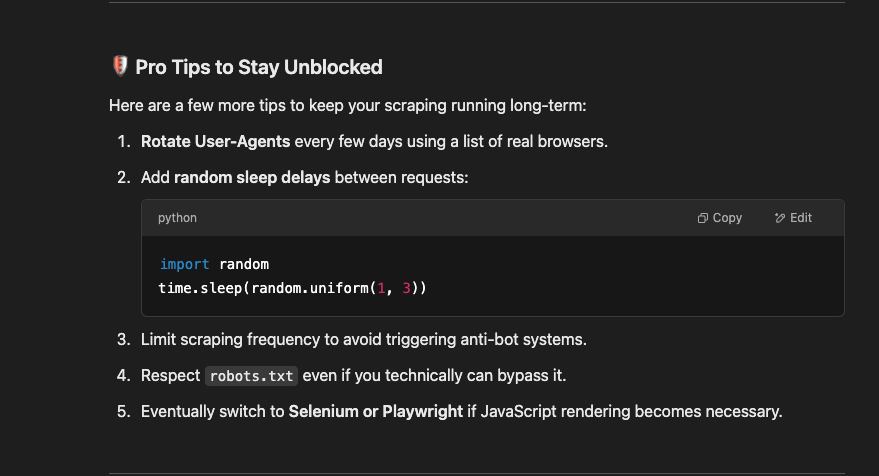

In [19]:
ft_all_crypto_df.to_csv("ft_all_crypto.csv")

In [28]:
ft_all_crypto_df.isna().sum()

title      0
link       0
snippet    4
date       5
symbol     0
dtype: int64

In [18]:
ft_all_crypto_df.head()

,title,link,snippet,date,symbol
0,Trump goes for shock therapy,https://www.ft.comhttps://www.ft.com/content/f...,The market was far too optimistic,2025-04-03,BTC
1,Bitcoin pares losses after sharp fall,https://www.ft.com/content/8c8062e5-2744-40ea-...,Bitcoin has recovered some ground after sharpl...,None,BTC
2,Gold surges to record high as investors seek s...,https://www.ft.com/content/8c8062e5-2744-40ea-...,Gold rose to a new record high as Donald Trump...,None,BTC
3,"Bitcoin falls below $85,000 after tariffs anno...",https://www.ft.com/content/8c8062e5-2744-40ea-...,The price of bitcoin sharply fell after Donald...,None,BTC
4,Stablecoin operator Circle files for IPO as re...,https://www.ft.comhttps://www.ft.com/content/7...,US firm is latest crypto group to try to take ...,2025-04-02,BTC


# Sentiment Analysis

In [2]:
from textblob import TextBlob


In [3]:

ft_df = pd.read_csv ("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/stock_api/ft_btc.csv")

In [4]:
ft_df.head()

,Unnamed: 0,title,link,snippet,date
0,0,Fidelity plans to launch stablecoin in digital...,https://www.ft.comhttps://www.ft.com/content/7...,Asset manager actively testing token as the Tr...,26-03-2025
1,1,Gold is the real ‘Trump put’,https://www.ft.comhttps://www.ft.com/content/1...,But the craziness from the White House has not...,26-03-2025
2,2,"Letter: Crypto, the missing piece in your essa...",https://www.ft.comhttps://www.ft.com/content/d...,"From Jón Helgi Egilsson, Former Chair, Supervi...",26-03-2025
3,3,Crypto group backed by Donald Trump to launch ...,https://www.ft.comhttps://www.ft.com/content/5...,World Liberty Financial’s new USD1 token marks...,25-03-2025
4,4,"Too many young people turn to crypto, says UK ...",https://www.ft.comhttps://www.ft.com/content/8...,FCA seeks to encourage more investment in shar...,25-03-2025


## Add sentiment scores to DF

In [5]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (negative) to +1 (positive)

# Apply to snippets
ft_df["sentiment"] = ft_df["snippet"].apply(get_sentiment)


## Categorize sentiment

In [6]:
def label_sentiment(score):
    if score > 0.2:
        return "🟢 Positive"
    elif score < -0.2:
        return "🔴 Negative"
    else:
        return "🟡 Neutral"

ft_df["sentiment_label"] = ft_df["sentiment"].apply(label_sentiment)


In [8]:
ft_df.groupby("sentiment_label").size()

sentiment_label
🔴 Negative      9
🟡 Neutral     197
🟢 Positive     44
dtype: int64

<Axes: xlabel='date'>

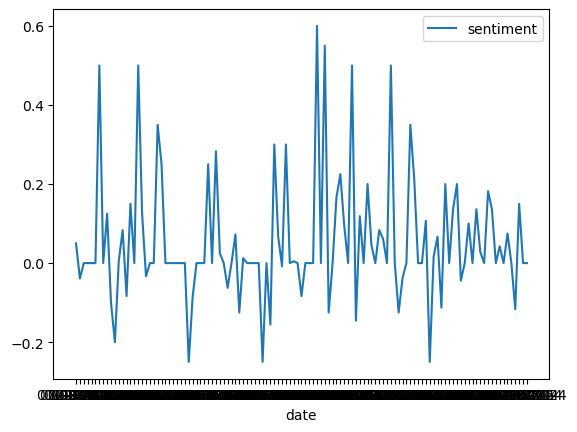

In [9]:
import seaborn as sns
sentiment_trend = ft_df.groupby("date")["sentiment"].mean().reset_index()
sns.lineplot(sentiment_trend.set_index("date"))

In [12]:
ft_df["date"] = pd.to_datetime(ft_df["date"], dayfirst=True)

In [13]:

ft_df["week"] = ft_df["date"].dt.to_period("W")  # weekly
ft_df["month"] = ft_df["date"].dt.to_period("M") 

<Axes: >

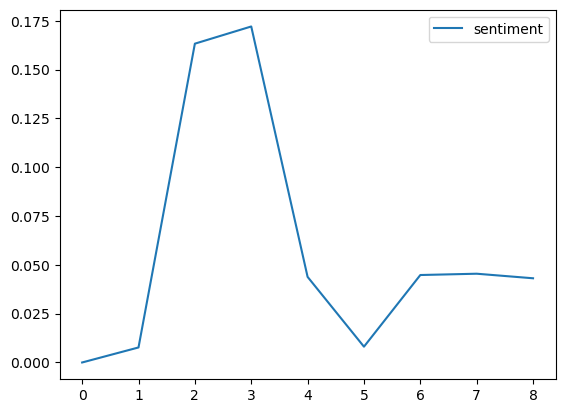

In [21]:
sentiment_trend = ft_df.groupby("month")["sentiment"].mean().reset_index()
sentiment_trend
sns.lineplot(sentiment_trend) 

# Multi crypto scraping with SerpApi

In [48]:
import os
import requests
from dateutil.parser import parse

def normalize_date(date_str):
    try:
        return parse(date_str).date()
    except:
        return None

def fetch_ft_articles_from_serpapi(query, pages=1):
    api_key = os.environ["SERP_API_KEY"]
    all_results = []

    for page in range(pages):
        params = {
            "engine": "google",
            "q": f"{query} site:ft.com",
            "api_key": api_key,
            "tbs": "sbd:1",  # Sort by date
            "start": page * 10
        }

        response = requests.get("https://serpapi.com/search", params=params)
        data = response.json()

        for result in data.get("organic_results", []):
            article = {
                "title": result.get("title"),
                "link": result.get("link"),
                "snippet": result.get("snippet"),
                "date": normalize_date(result.get("date"))
            }
            if article["date"]:  # Skip if date is missing
                all_results.append(article)

    return all_results

# 🔁 Multi-crypto wrapper
def scrape_ft_multi_crypto(crypto_queries):
    print("🚀 Scraping Financial Times via SerpAPI...")
    all_articles = []

    for symbol, query in crypto_queries.items():
        print(f"🔍 Searching for {symbol} ({query})")
        results = fetch_ft_articles_from_serpapi(query, pages=1)
        for article in results:
            article["symbol"] = symbol
            all_articles.append(article)

    print(f"✅ Found {len(all_articles)} articles total.")
    return all_articles



In [49]:
crypto_queries = {
    "BTC": "bitcoin",
    "ETH": "ethereum",
    "USDT": "tether",
    "XRP": "xrp",
    "SOL": "solana"
}

articles = scrape_ft_multi_crypto(crypto_queries)



🚀 Scraping Financial Times via SerpAPI...
🔍 Searching for BTC (bitcoin)
🔍 Searching for ETH (ethereum)
🔍 Searching for USDT (tether)
🔍 Searching for XRP (xrp)
🔍 Searching for SOL (solana)
✅ Found 20 articles total.


In [54]:
print(articles)

[{'title': 'Can Trump make bitcoin useful? - Visual and data journalism', 'link': 'https://ig.ft.com/trump-bitcoin-reserve/', 'snippet': 'Advocates say bitcoin would be an effective reserve asset as its supply is finite. Only 21mn coins will ever exist due to the algorithm written ...', 'date': datetime.date(2025, 2, 11), 'symbol': 'BTC'}, {'title': 'Crypto prices fall as US strategic reserve plan disappoints ...', 'link': 'https://www.ft.com/content/08a1f7f3-4be2-4f36-959d-4ac57213450b', 'snippet': 'The price of bitcoin dropped 2.7 per cent to trade at about $88,000 after the order, signed late on Thursday, said the reserve would hold only ...', 'date': datetime.date(2025, 3, 7), 'symbol': 'BTC'}, {'title': 'The MicroStrategy copycats: companies turn to bitcoin ...', 'link': 'https://www.ft.com/content/f964fe30-cb6e-427d-b7a7-9adf2ab8a457', 'snippet': "MicroStrategy's founder Michael Saylor has made bitcoin his company's primary treasury reserve with an aggressive buying spree since 2

# SerpApi news engine

In [43]:
import os
import requests
from dateutil.parser import parse
from datetime import date

def normalize_date(date_str):
    try:
        return parse(date_str).date()
    except:
        return None

def get_news_articles_from_serpapi(query, pages=1):
    api_key = os.environ["SERP_API_KEY"]
    all_results = []

    for page in range(pages):
        params = {
            "engine": "google_news",           # 🔹 news engine!
            # "q": f"{query} site:ft.com",       # restrict to FT
            "q": query,
            "api_key": api_key,
            "start": page * 10
        }

        response = requests.get("https://serpapi.com/search", params=params)
        data = response.json()

        for article in data.get("news_results", []):
            result = {
                "title": article.get("title"),
                "link": article.get("link"),
                "snippet": article.get("snippet"),
                "date": normalize_date(article.get("date"))
            }
            all_results.append(result)

    return all_results

# 🔁 Multi-crypto wrapper
def fetch_crypto_news_articles():
    crypto_queries = {
        "BTC": "bitcoin",
        "ETH": "ethereum",
        "USDT": "tether",
        "XRP": "xrp",
        "SOL": "solana"
    }

    all_articles = []

    for symbol, query in crypto_queries.items():
        print(f"🔍 Fetching news for {symbol}")
        articles = get_news_articles_from_serpapi(query)
        for article in articles:
            article["symbol"] = symbol

            # Only keep articles with a date
            if article["date"] is not None:
                all_articles.append(article)

    print(f"✅ Found {len(all_articles)} recent articles.")
    return all_articles


Not working. Going back to plan A